# Eurovision Data Analysis: Rankings, Trends & Winners

Project Overview

This project analyzes Eurovision Song Contest historical data to identify countries with the most frequent top 3 placements (1st, 2nd, or 3rd place).
The goal is to uncover patterns of consistent high performance among countries based on final rankings, using Python for data manipulation and visualization. The analysis is structured clearly to demonstrate practical data analytics skills.

Dataset Information

The dataset contains historical Eurovision contest results with one row per song, including details such as country, performer, year, and final placement.

## Load and Preview the Dataset

In this and the next sections, we import essential Python libraries for data analysis and load the dataset from a CSV file.  
The dataset contains Eurovision performance data, including countries, performers, years, and final placements.

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/yaryna-mandaryna/eurovision-data-analysis/main/Eurovision_AllFinals.csv"
df = pd.read_csv(url, encoding="windows-1252")

### Explore the data and check structure

We use basic commands like `.head()`, `.describe()` and `.info()` to examine the structure of the dataset, check column types, and verify that there are no missing values.

In [4]:
df.head()

,Country,Year,Type,Points,Place,Draw,Performer,Song
0,Albania,2004,F,106,7 (24),9,Anjeza Shahini,The Image Of You
1,Albania,2005,F,53,16 (24),8,Ledina Celo,Tomorrow I Go
2,Albania,2008,F,55,17 (25),3,Olta Boka,Zemrën E Lamë Peng
3,Albania,2009,F,48,17 (25),19,Kejsi Tola,Carry Me In Your Dreams
4,Albania,2010,F,62,16 (25),15,Juliana Pasha,It's All About You


In [ ]:
df.describe()

,Year,Points,Draw
count,1359.000000,1359.000000,1359.000000
mean,1992.712288,73.275938,11.412068
std,18.130287,84.437363,6.699045
min,1957.000000,0.000000,1.000000
25%,1978.000000,15.000000,6.000000
50%,1994.000000,50.000000,11.000000
75%,2008.000000,97.000000,17.000000
max,2022.000000,758.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    1359 non-null   object
 1   Year       1359 non-null   int64 
 2   Type       456 non-null    object
 3   Points     1359 non-null   int64 
 4   Place      1359 non-null   object
 5   Draw       1359 non-null   int64 
 6   Performer  1359 non-null   object
 7   Song       1359 non-null   object
dtypes: int64(3), object(5)
memory usage: 85.1+ KB


The dataset provides a comprehensive historical overview, allowing analysis of individual performances and country-level trends over time.

### Extracting Numeric Placements

 We create a new column that extracts only the numeric part of the placement and converts it to integer. Then, we count how often each placement occurs.

In [ ]:
# Extract only the numeric part of "Place" column and convert to integer
df['Place_only'] = df['Place'].str.extract(r'^([0-9]+) ').astype('Int64')
df.head()

,Country,Year,Type,Points,Place,Draw,Performer,Song,Place_only
0,Albania,2004,F,106,7 (24),9,Anjeza Shahini,The Image Of You,7
1,Albania,2005,F,53,16 (24),8,Ledina Celo,Tomorrow I Go,16
2,Albania,2008,F,55,17 (25),3,Olta Boka,Zemrën E Lamë Peng,17
3,Albania,2009,F,48,17 (25),19,Kejsi Tola,Carry Me In Your Dreams,17
4,Albania,2010,F,62,16 (25),15,Juliana Pasha,It's All About You,16


### Participants Over Time

Here, we examine the yearly number of participating countries in Eurovision to identify participation trends and notable fluctuations over time.

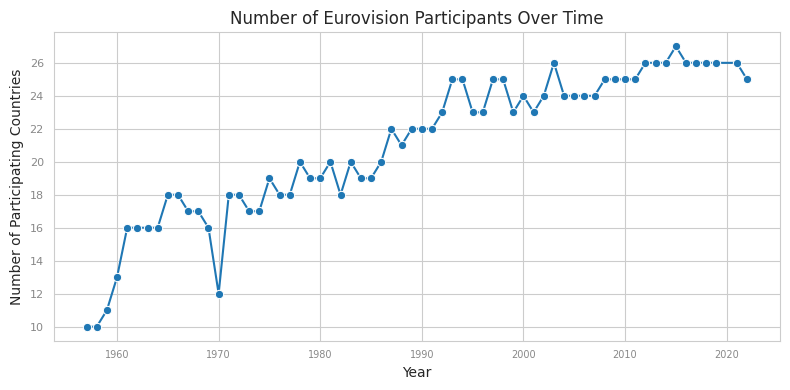

In [ ]:
df_count_by_year = df[['Year','Country']].groupby('Year')['Country'].count()
sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_count_by_year, marker='o', linewidth=1.5)
plt.title("Number of Eurovision Participants Over Time", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Number of Participating Countries", fontsize=10)
plt.xticks(fontsize=7, color='#888888')
plt.yticks(range(10, 27, 2),fontsize=8, color='#888888')
plt.tight_layout()
plt.show()

The line plot reveals a generally steady increase in the number of participating countries, growing from about 10 in the early years to over 20 in recent years.

However, there is a noticeable drop in 1970, where participation fell sharply to 12 countries.

The sharp decline in 1970 corresponds to a historical boycott by five countries following a four-way tie in 1969. This protest targeted perceived flaws in the voting system, leading to the introduction of new tie-breaking rules from 1970 onwards.

### Distribution of Final Placements

Next, we analyze the distribution of final placements by counting how many times each position (place) has been occupied throughout the contest history.  
This analysis provides an overview of how final placements are distributed across all contests, revealing the frequency of each rank and highlighting the overall spread of results.

In [ ]:
#How many times was each of the places occupied?
df["Place_only"].value_counts().sort_index().head()

,count
Place_only,
1,68
2,65
3,64
4,72
5,64


The values are relatively evenly distributed, without a strong dominance of any specific rank.  
Because of that, a bar plot would not provide much additional insight — a textual output is clearer and more concise in this case.

## Exploring Top Eurovision Countries and Founder Influence

This section identifies countries with the most frequent top 3 placements and investigates whether the founding members of the Eurovision Song Contest tend to dominate the top rankings compared to other countries.

### Tagging Founder Countries
A boolean flag is added to mark whether a country was a founding participant of the Eurovision Song Contest, enabling comparative analysis between founding and non-founding countries.

In [ ]:
# Identify founding countries and flag them
Founders = ["Belgium", "France", "Germany", "Italy", "Luxembourg", "Netherlands", "Switzerland"]
df['Founder'] = df['Country'].isin(Founders)
df.head()

,Country,Year,Type,Points,Place,Draw,Performer,Song,Place_only,Founder
0,Albania,2004,F,106,7 (24),9,Anjeza Shahini,The Image Of You,7,False
1,Albania,2005,F,53,16 (24),8,Ledina Celo,Tomorrow I Go,16,False
2,Albania,2008,F,55,17 (25),3,Olta Boka,Zemrën E Lamë Peng,17,False
3,Albania,2009,F,48,17 (25),19,Kejsi Tola,Carry Me In Your Dreams,17,False
4,Albania,2010,F,62,16 (25),15,Juliana Pasha,It's All About You,16,False


Marking founders facilitates analysis of their performance relative to other countries, setting the stage for comparative insights.

### Filtering Top Placements
The dataset is filtered to retain only entries where a country placed 1st, 2nd, or 3rd. We then count how many times each country achieved these top placements to identify the most successful participants.

In [ ]:
# Filter for top 3 placements only
total_countries = df[df['Place_only'].isin([1,2,3])]
top_winners = total_countries.value_counts('Country', ascending = False)  #counting the number of victories of each country (is desc order)
print(top_winners.head(6), '\n')
total_countries.head()

Country
United Kingdom    24
France            17
Sweden            13
Ireland           12
Italy             11
Germany           11
Name: count, dtype: int64 



,Country,Year,Type,Points,Place,Draw,Performer,Song,Place_only,Founder
22,Australia,2016,F,511,2 (26),13,Dami Im,Sound Of Silence,2,False
36,Austria,1966,NaN,31,1 (18),9,Udo Jürgens,Merci Chérie,1,False
69,Austria,2014,F,290,1 (26),11,Conchita Wurst,Rise Like a Phoenix,1,False
73,Austria,2018,F,342,3 (26),5,Cesár Sampson,Nobody But You,3,False
75,Azerbaijan,2009,F,207,3 (25),11,AySel & Arash,Always,3,False


Filtering for top placements highlights leading countries, revealing a core group dominating Eurovision success.

### Visualizing Top 6 Performing Countries
This barplot highlights the six countries with the highest number of top 3 placements, illustrating their dominance in Eurovision history.

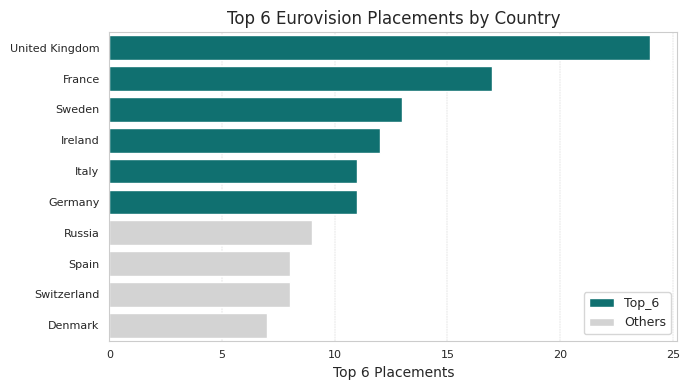

In [ ]:
# Prepare data for top 6 countries visualization (I chose 6 countries because of the equal results in the 5th and 6th places)
top_countries = top_winners.reset_index()                     # transform first column to ordinary column, adding number index (from 0 to ...)
top_countries.columns = ['Country', 'Top_6_Count']            # adding names for columns
top_countries['Top6_Group'] = ['Top_6' if i < 6 else 'Others' for i in range(len(top_countries))]    #creating new column: is country in Top6 or Others group?

# Barplot: Top 6 Eurovision placements
fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(data= top_countries.head(10), y='Country', x ='Top_6_Count',
            hue='Top6_Group', ax=ax, order=top_countries['Country'].head(10),
            palette={'Top_6': 'teal', 'Others': 'lightgrey'})  #create an object
ax.set_title('Top 6 Eurovision Placements by Country')

ax.grid(True, axis='x', linestyle='--', linewidth=0.35)     # optional gridlines

ax.set_xlabel('Top 6 Placements')     # axis labels
ax.set_ylabel('')
plt.legend(title=None, fontsize = 9)

ax.tick_params(axis='y', labelsize=8)    # ticks and layout
ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

The data clearly shows that a handful of countries consistently secure top 3 placements in Eurovision, indicating a strong and sustained competitive edge. This concentration of success highlights the dominance of countries like Ireland, Sweden, and the United Kingdom over the contest's history

### Creating a Pivot Table for Top 3 Placements
Using a pivot table, we break down the top 10 countries by the count of their 1st, 2nd, and 3rd place finishes, providing a detailed view of their top-ranking distributions.

In [ ]:
# Create pivot table for top 3 placements by country
result = total_countries.pivot_table( index = "Country",  columns = "Place_only", values = "Performer", aggfunc='count', fill_value=0)
result.columns = ['Place_1', 'Place_2', 'Place_3']  #renaming columns
result_sorted = result.sort_values(by=['Place_1', 'Place_2', 'Place_3'], ascending=[False, False, False]).head(10)    #sorting by Place_1, Place_2, Place_3 desc
result_sorted

,Place_1,Place_2,Place_3
Country,,,
Ireland,7,4,1
Sweden,6,1,6
United Kingdom,5,16,3
France,5,5,7
Netherlands,5,1,1
Luxembourg,5,0,2
Israel,4,2,1
Italy,3,3,5
Ukraine,3,2,1


By breaking down the top placements into 1st, 2nd, and 3rd places, we uncover distinct performance profiles among leading countries.

For example, Ireland holds the record for the most wins (7), but has relatively few lower top-3 finishes (4 second places, 1 third). In contrast, the United Kingdom has only 5 wins but stands out with an exceptional 16 second-place finishes, reflecting a pattern of frequent near-wins. Sweden is unique with a more balanced top-3 distribution (6 wins and 6 third places, but only 1 second), while France has placed in all top-3 ranks somewhat evenly.

These patterns highlight different forms of competitive success: dominance through wins, resilience through frequent near-top finishes, or balanced high performance.

### Visualizing Top 10 Countries by Placement Rank
The stacked barplot displays the distribution of 1st, 2nd, and 3rd place finishes among the top 10 countries, emphasizing differences in their relative success levels.

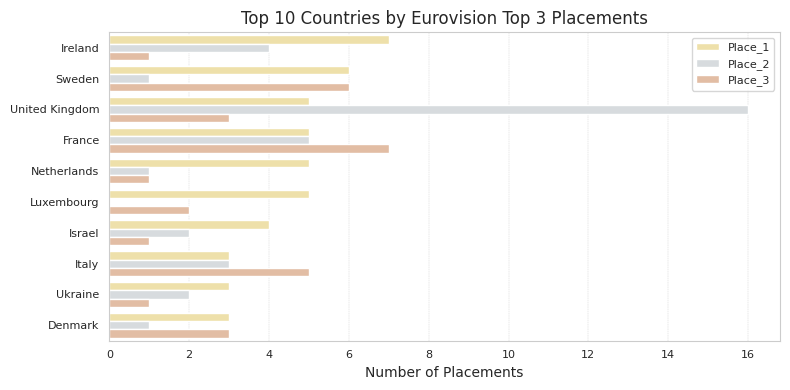

In [ ]:
# Unpivot data for barplot
result = result_sorted.reset_index()            # tranform 'Country' to column, not an index
country_order = result['Country'].tolist()      # Create a variable with the order of countries

df_melted = result.melt(id_vars='Country', value_vars=['Place_1', 'Place_2', 'Place_3'],
                        var_name='Place', value_name='Count')                             # Unpivoting table
colors = {"Place_1": "#F9E79F", "Place_2": "#D6DBDF", "Place_3": "#EDBB99"}
fig, ax = plt.subplots(figsize=(8, 4))                                                                # creating a container for all elements of a plot or visualization
sns.barplot(data=df_melted, x='Count', y='Country', hue='Place', palette=colors, order=country_order, ax=ax)
plt.title('Top 10 Countries by Eurovision Top 3 Placements')

ax.grid(True, axis='x', linestyle='--', linewidth=0.3) #gridlines
ax.tick_params(labelsize=8)
plt.xlabel('Number of Placements')
plt.ylabel('')
plt.legend(title=None, fontsize = 8)
plt.tight_layout()
plt.show()

The barplot confirms the previous finding: a small group of countries has consistently dominated the top placements, reflecting long-term competitive strength.

### Overview of Participation and Winners

This section summarizes the overall diversity of Eurovision participation by counting unique countries that have competed and those that have ever reached the top 3, highlighting the concentration of success among participants.

In [ ]:
# Print number of unique countries and top 3 winners
print(f"the number of unique participants: {df['Country'].nunique()}")
print(f"the number of unique winners : {df[df['Place_only'].isin([1, 2, 3])]['Country'].nunique()}")

the number of unique participants: 51
the number of unique winners : 37


Although many countries participate in Eurovision, only about 37 out of 51 have ever reached a top 3 placement. This reveals a clear competitive hierarchy where a significant number of countries consistently fall short of podium finishes, highlighting the challenge of breaking into the top ranks.

### Were the Founders Among the Leaders?
We analyze whether founding countries disproportionately appear among the leading Eurovision performers by examining the top 25 countries with the most top 3 placements and comparing founder status.

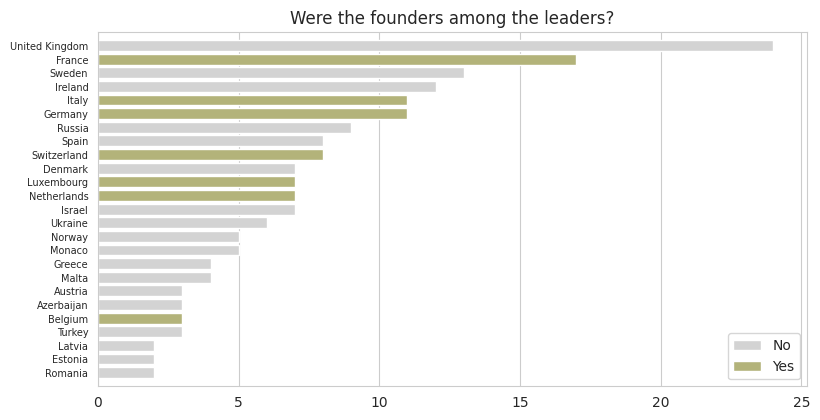

In [ ]:
# Top 25 countries analysis — founders' participation
colors_founders = {True: "#BDBC70", False: "#d3d3d3"}      #create palette among founders
country_order = top_countries['Country'].value_counts().sort_values(ascending=False).index     #set desc order
top_25_countries = country_order[:25]
top_countries_top25 = total_countries[total_countries['Country'].isin(top_25_countries)]
# Create a viz
plt.figure(figsize=(8.5, 4.5))
plt.title('Were the founders among the leaders?')
plt.yticks(fontsize=7)
ax = sns.countplot(data=top_countries_top25, y='Country',           #create an object
                  order=top_25_countries,
                  hue='Founder',
                  palette=colors_founders)
plt.legend(title='', labels=['No', 'Yes'])
plt.tight_layout()
plt.ylabel('')
plt.xlabel('')

bottom, top = ax.get_ylim()
# Change edges
padding = (top - bottom) * 0.02
ax.set_ylim(bottom - padding, top + padding)

plt.show()

The leader in top placements is Great Britain, which is not a founding country. Among the top 6 countries, only three are founding members. This indicates that while founding countries have a strong presence, non-founder countries can also dominate the contest, highlighting the dynamic and evolving nature of Eurovision’s competitive landscape.

## Tracking Year-to-Year Placement Changes

This analysis examines countries’ placements in consecutive years to identify patterns of improvement, decline, or consistency, with a focus on whether any countries achieved back-to-back first-place wins.

In [ ]:
# Analyze consecutive winners
df_top = df[df['Place'].str.contains(r'^[1] ', regex=True)].copy()    # filtering dataset be regex, creat a copy with only 1 places
df_top.sort_values(by=['Country', 'Year'], inplace=True)         # sorting (important before shift), the original dataset is changed

# Cteating lead-columns — shift(-1) gives "next row"
df_top['Next_performer'] = df_top.groupby('Country')['Performer'].shift(-1)             #for Performer
df_top['Next_year'] = df_top.groupby('Country')['Year'].shift(-1, fill_value=0)         #for Year
df_top['Next_place'] = df_top.groupby('Country')['Place_only'].shift(-1, fill_value=0)  #for Place_only

# Filter consecutive years with consecutive wins
df_result = df_top[df_top['Next_year'] - df_top['Year'] == 1][
    ['Country', 'Performer', 'Next_performer', 'Year', 'Next_year', 'Place_only', 'Next_place']   #left only 'Country', 'Performer', 'Next_performer', 'Year', 'Next_year', 'Place_only', 'Next_place' filtered columns
]
df_result.sort_values('Year', ascending=True)
#df_result.shape[0]

,Country,Performer,Next_performer,Year,Next_year,Place_only,Next_place
1054,Spain,Massiel,Salomé,1968,1969,1,1
711,Luxembourg,Vicky Leandros,Anne-Marie David,1972,1973,1,1
594,Israel,Izhar Cohen and the Alphabeta,Milk and Honey,1978,1979,1,1
570,Ireland,Linda Martin,Niamh Kavanagh,1992,1993,1,1
571,Ireland,Niamh Kavanagh,Paul Harrington and Charlie McGettigan,1993,1994,1,1


Only a few countries have managed to win Eurovision in consecutive years. Specifically, Spain, Luxembourg, Israel, and Ireland achieved back-to-back victories, with Ireland standing out by winning three years in a row from 1992 to 1994. These rare cases highlight periods of exceptional dominance by individual countries.

## Analyzing Repeat Performers

Here, we identify performers with multiple Eurovision participations and analyze changes in their rankings across different years, exploring trends in individual career trajectories.

### Performers Who Participated Multiple Times

In [ ]:
# Find repeat performers and their placements
performer_counts = df['Performer'].value_counts()       # How many times did every performer take part in Eurovision?
duplicate_performers = performer_counts[performer_counts > 1].index     #Who took part more than 1 time?
df[df['Performer'].isin(duplicate_performers)][['Country', 'Year', 'Performer']]          #filtering dataset and lefting only rows with performers who took part more that 1 time
more_than1 = df[df['Performer'].isin(duplicate_performers)][['Country','Performer']].groupby(['Country', 'Performer']).size().reset_index(name='Count_of_times')  #grouping and counting rows in each group
print(f'There are {more_than1.shape[0]} unique Performers, who took part more that 1 time')
print('')
pd.set_option('display.max_rows', None)
more_than1.head(10)

There are 95 unique Performers, who took part more that 1 time



,Country,Performer,Count_of_times
0,Austria,Gary Lux,2
1,Austria,Thomas Forstner,2
2,Austria,Tony Wegas,2
3,Austria,Udo Jürgens,3
4,Belgium,Bob Benny,2
5,Belgium,Fud Leclerc,3
6,Belgium,Jean Vallée,2
7,Belgium,Louis Neefs,2
8,Bosnia Herzegovina,Regina,1
9,Croatia,Doris Dragovic,1


In total, 95 unique performers have taken part in the Eurovision Song Contest more than once.

You may notice that some performers in the table appear with a count of 1.
That’s because, although they joined the contest multiple times, they did so while representing different countries, so their appearances are counted separately by country.

### Identifying Performers Representing Multiple Countries

This section identifies performers who competed for different countries in separate Eurovision contests, highlighting instances of cross-country representation and artistic mobility.

In [ ]:
# Identify artists who performed for different countries
took_part_from_dif_countries = more_than1[more_than1['Count_of_times']==1][['Performer', 'Country', 'Count_of_times']].sort_values(by = 'Performer')
print(f"There are {took_part_from_dif_countries['Performer'].nunique()} unique performers who took part from different countries.")
print('')
took_part_from_dif_countries.head()

There are 16 unique performers who took part from different countries.



,Performer,Country,Count_of_times
10,Anna Vissi,Cyprus,1
29,Anna Vissi,Greece,1
17,Anne-Marie David,France,1
44,Anne-Marie David,Luxembourg,1
9,Doris Dragovic,Croatia,1


The analysis reveals that there are 16 unique performers who took part in Eurovision representing different countries.
This indicates some level of mobility or collaboration across countries in the contest, which may be interesting to explore further in terms of their performance outcomes or reasons for country changes.

## Comparing Performers’ Participation Across Years

We merge participation data to compile a chronological record of each recurring performer’s placements, facilitating analysis of their performance trends over time.

In [ ]:
# Merge participation records to compare placements across years
merged = more_than1.merge(df, on = ['Performer', 'Country'], how = 'left')[['Performer', 'Country', 'Year', 'Place_only']].sort_values(by =['Performer', 'Year'])
merged.head()

,Performer,Country,Year,Place_only
107,Alexander Rybak,Norway,2009,1
108,Alexander Rybak,Norway,2018,15
109,Anita Skorgan,Norway,1977,14
110,Anita Skorgan,Norway,1979,11
148,Anita Traversi,Switzerland,1960,8


The merged dataset shows detailed participation history for performers with multiple entries, including the years they competed and their final placements.
For example, Alexander Rybak’s results illustrate a peak performance in 2009 followed by a lower placement in 2018, indicating variability in outcomes across different contests.
This sets the stage for further analysis on performance trends of recurring artists.

## Analyzing Changes in Performers’ Placements Between Consecutive Participations

This step calculates changes in performers’ rankings between consecutive participations by comparing current and next placement values. The data is organized by performer and year to enable time-sequenced analysis of improvements or declines.

In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x) #the rule how to display float

# Calculate improvement or drop in placement
merged_sorted = merged.sort_values(by=['Performer', 'Year'])
merged_sorted['Next_Place'] = merged_sorted.groupby('Performer')['Place_only'].shift(-1)
merged_sorted['Next_Country'] = merged_sorted.groupby('Performer')['Country'].shift(-1)
merged_sorted['Next_Year'] = merged_sorted.groupby('Performer')['Year'].shift(-1)

merged_sorted['Place_Change'] = merged_sorted['Place_only'] - merged_sorted['Next_Place']
merged_filtered = merged_sorted.dropna(subset=['Next_Place'])
merged_filtered.head(10)

,Performer,Country,Year,Place_only,Next_Place,Next_Country,Next_Year,Place_Change
107,Alexander Rybak,Norway,2009,1,15,Norway,2018,-14
109,Anita Skorgan,Norway,1977,14,11,Norway,1979,3
148,Anita Traversi,Switzerland,1960,8,13,Switzerland,1964,-5
20,Anna Vissi,Cyprus,1982,5,9,Greece,2006,-4
82,Anne-Marie David,Luxembourg,1973,1,3,France,1979,-2
139,Björn Skifs,Sweden,1978,14,10,Sweden,1981,4
9,Bob Benny,Belgium,1959,6,15,Belgium,1961,-9
83,Camillo Felgen,Luxembourg,1960,13,3,Luxembourg,1962,10
120,Carlos Mendes,Portugal,1968,11,7,Portugal,1972,4
141,Carola,Sweden,1991,1,5,Sweden,2006,-4


We prepare data for visualization by identifying the top 3 improvements and declines in placement among returning performers. This highlights notable shifts in performance across contest appearances.

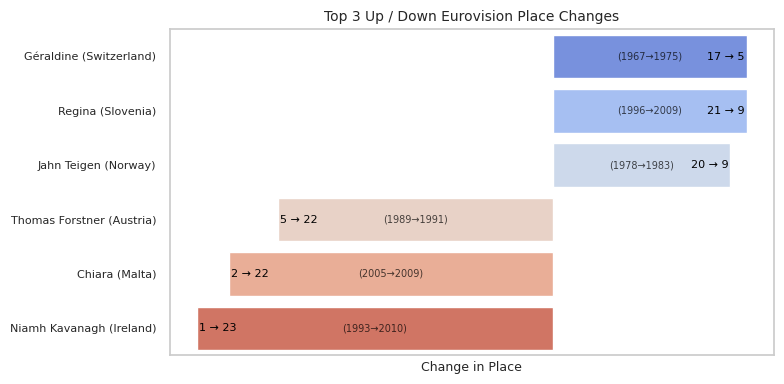

In [ ]:
merged_filtered = merged_sorted.dropna(subset=['Next_Place']).copy()
merged_filtered['Performer_Country'] = merged_filtered['Performer'] + ' (' + merged_filtered['Country'] + ')' #creating a new column with additional info (wich country the Performer presented)

# Get top 3 improvements and top 3 declines
top_3 = merged_filtered[merged_filtered['Place_Change'] > 0].nlargest(3, 'Place_Change')    # top-3 improvements
bottom_3_raw = merged_filtered[merged_filtered['Place_Change'] < 0].nsmallest(3, 'Place_Change') # top 3 worsening (але сортуємо не по значенню, а по абсолютному значенню)
bottom_3 = bottom_3_raw.reindex(bottom_3_raw['Place_Change'].abs().sort_values().index)
top_changes = pd.concat([top_3, bottom_3])            #merging
y_order = top_3.sort_values('Place_Change', ascending=False)['Performer_Country'].tolist() + bottom_3['Performer_Country'].tolist() # the order for y ax

# Plot placement changes
import matplotlib.patheffects
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")

ax = sns.barplot(
    data=top_changes, x='Place_Change',
    y='Performer_Country', hue='Performer_Country',
    palette='coolwarm', dodge=False,
    legend=False)

plt.grid(True, axis='x', linestyle='--', linewidth=0.7, alpha=0.6)

for i, row in top_changes.iterrows():
    performer_country = row['Performer_Country']
    change = row['Place_Change']
    start = int(row['Place_only'])
    end = int(row['Next_Place'])
    year_start = int(row['Year'])
    year_end = int(row['Next_Year'])

    main_label = f"{start} → {end}"
    years_label = f"({year_start}→{year_end})"

    y_pos = list(top_changes['Performer_Country']).index(performer_country)

    if change > 0:                    # positions for main text(on the edge of the bar)
        x_main = change - 0.1
        ha_main = 'right'
    else:
        x_main = change + 0.1
        ha_main = 'left'

    x_years = change / 2              # positions foe years (on the center of the bar)
    ha_years = 'center'

    plt.text(                         # adding main text
           x_main, y_pos, main_label, va='center', ha=ha_main,
        fontsize=8, color='black')

    plt.text(                         # adding years with less accent
        x_years, y_pos, years_label, va='center',
        ha=ha_years, fontsize=7, color='black',
        alpha=0.7)

plt.title('Top 3 Up / Down Eurovision Place Changes', fontsize=10)
plt.xlabel('Change in Place', fontsize=9)
plt.ylabel('')
plt.xticks([])
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


The plot reveals striking examples of performers who dramatically improved or worsened their Eurovision rankings between consecutive participations.
This dynamic analysis provides insight into the volatility of contest outcomes for repeat participants, showing both impressive comebacks and significant declines.

## Analysis of Placement Transitions Between Consecutive Participations

We categorize recurring participants based on their transitions relative to top 3 placements: those maintaining, falling from, rising to, or never reaching the podium. This classification reveals patterns of performance consistency and change.

In [ ]:
# Analyze transitions between top and non-top placements
fell_from_podium = merged_filtered[(merged_filtered['Place_only'].isin([1, 2, 3])) & (~merged_filtered['Next_Place'].isin([1, 2, 3]))] # participants who were in the top 3 initially but dropped out later
stayed_on_podium = merged_filtered[(merged_filtered['Place_only'].isin([1, 2, 3])) & (merged_filtered['Next_Place'].isin([1, 2, 3]))] #participants who stayed in the top 3 across both participations
rose_to_podium = merged_filtered[(~merged_filtered['Place_only'].isin([1, 2, 3])) & (merged_filtered['Next_Place'].isin([1, 2, 3]))]  #participants who rose to the top 3 from a non-top position

never_been_in_the_top = merged_filtered[(~merged_filtered['Place_only'].isin([1, 2, 3])) & (~merged_filtered['Next_Place'].isin([1, 2, 3]))] #participants who have never been in the top 3

total = len(merged_filtered)                  #calculating total for every group
fell_count = len(fell_from_podium)
stayed_count = len(stayed_on_podium)
rose_count = len(rose_to_podium)
never_count = len(never_been_in_the_top)

fell_pct = round(fell_count / total * 100)    #calculating % for every group
stayed_pct = round(stayed_count / total * 100)
rose_pct = round(rose_count / total * 100)
never_pct = round(never_count / total * 100)

print(f"Total: {total}")
print(f"Stayed in top 3: {stayed_count} ({stayed_pct}%)")
print(f"Fell from top 3: {fell_count} ({fell_pct}%)")
print(f"Rose to top 3: {rose_count} ({rose_pct}%)")
print(f"Never reached top 3: {never_count} ({never_pct}%)")

Total: 89
Stayed in top 3: 14 (16%)
Fell from top 3: 14 (16%)
Rose to top 3: 5 (6%)
Never reached top 3: 56 (63%)


Among 89 artists who represented a country more than once:

- 16% (14 artists) managed to remain in the top 3 in both of their participations, demonstrating consistent high performance.
- 16% (14 artists) were in the top 3 initially but dropped out of the top ranks in their subsequent participation, showing how challenging it is to maintain top positions.
- 6% (5 artists) improved notably by rising into the top 3 after previously missing it.
- A significant 63% (56 artists) never reached the top 3 in any of their participations.

Summary:
Although some performers maintain or improve their standing, the data shows that repeat participation does not guarantee better results. Nearly two-thirds of recurring artists never reach the podium, and even those who start strong often struggle to replicate their initial success.

## Export Processed Data

No consolidated final dataset was produced; all data transformations were performed within individual analysis steps tailored to specific tasks.

# Conclusion
This project demonstrates the ability to conduct end-to-end data analysis on a real-world dataset, covering:

* Data loading and cleaning
* Exploratory data analysis
* Aggregation and transformation
* Data visualization
* Interpretation of trends and performance metrics

Key insights include:
 * Countries like Ireland, Sweden, and the United Kingdom have consistently dominated Eurovision top placements.
 * The number of participants has steadily increased over time, reflecting the growing popularity of the contest.
 * Founding countries show diverse performance trends — while some like Sweden perform strongly, others do not dominate the top 3 as often.
 * Eurovision’s historical disruptions, such as the 1970 boycott, are visible in participation trends and align with known events.

While no advanced statistical modeling or machine learning was applied, the project effectively highlights practical analytics skills suitable for a junior data analyst role. It offers valuable insights into Eurovision’s competitive landscape and provides a solid base for future expansion — such as:

* Analyzing voting patterns by country
* Exploring the impact of language, genre, or performance order
* Applying predictive modeling to forecast future winners

*Thank you for reviewing my work!*